WeatherPy

   Looking at scatterplot and linear regression for different weather variables against lattitude shows several features.  Most noteably is the further from lattitude of zero (equator), the lower the temperatures.  Since the air is mostly warmed via solar radiation and the earth titlts its axis to the sun across the equator, the equatorial regions see more sun and therefore more heat.  Further, it is currently summer in the northern hemisphere*', meaning the sun is 'above the equator', creating warmer air north of the equator.
  As far as the other variables (wind speed, humidity, and cloud cover) are concerned, there does not appear to be any causation that the distance from the equator, either north or south, has any affect on them.  Although there are some noticeable differences between the northern and southern hemispheres, in general they should even out with a larger sampling across various points in time as weather conditions move and change.  Figure 10 in section 17 does show a regression line suggesting it would be cloudier further south of the equator, though the data points on the underlying scatter plot do not suggest an actual relationship.
  
*' code has been rerun on 5/10/2021, where it is currently spring in the northern hemisphere.

In [1]:
%matplotlib notebook
#############################################################
#00       I/O                                               #
#   a- import libraries and api key.                        #
#   b- associate output file to variable.                   #
#   c- set lat & lng parameter for call to np in step 01.   #
#############################################################

#a
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import scipy.stats as st
from citipy import citipy
import json
from api_keys import weather_api_key
import datetime as dt

# b
output_data_file = "output_data/cities.csv"

#c
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#######################################################
#01        CityList                                   #
#   a- get random lat and long coordinates from np.   #
#   b- call citypy with coords, get nearest city,     #
#      add to cities list if new.                     #
#   c- verify at least 500 cities via print.          #
#######################################################

#a
lat_lngs = []
cities = []
countries = []

lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

#b
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    if city not in cities:
        cities.append(city)
#c
print(len(cities))

622


In [3]:
##############################################################################
#02        Fill Dataframe                                                    #
#   a- create df from cities, add fields to populate.                        # 
#   b- set up url base for calls to openweather.                             #
#     - create list for indexes, to delete if no weather records for city.   #
#     - subtract utc offset from utc epoch time, convert, add to df.         #         
#   c- retrieve info for each city, populate df.                             #
#   d- delete cities from df if no weather records, check remaining count.   #
##############################################################################

#a
city_weather = pd.DataFrame({"city": cities})
city_weather["temp"] = ""
city_weather["humid"] = ""
city_weather["wind"] = ""
city_weather["clouds"] = ""
city_weather["lat"] = ""
city_weather["lng"] = ""
city_weather["maxtemp"] = ""
city_weather["country"] = ""
city_weather["local_date_time"] = ""

#b
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
del_indexes = []

#c
for x, row in city_weather.iterrows():
    print("*" * 55)
    current_city = city_weather["city"][x]
    print(f"checking openweather for city number {x+1} : {current_city}")
    response = requests.get(query_url + row["city"]).json()
    
    try:
        city_weather.loc[x, "temp"] = response["main"]["temp"]
        city_weather.loc[x, "humid"] = response["main"]["humidity"]
        city_weather.loc[x, "wind"] = response["wind"]["speed"]
        city_weather.loc[x, "clouds"] = response["clouds"]["all"]                 
        city_weather.loc[x, "lat"] = response["coord"]["lat"]
        city_weather.loc[x, "lng"] = response["coord"]["lon"]
        city_weather.loc[x, "maxtemp"] = response["main"]["temp_max"]
        city_weather.loc[x, "country"] = response["sys"]["country"]
        utc_off = response["timezone"]                            # local time offset in seconds from UTC
        utc_time = response["dt"]                                 # current UTC in epoch time
        local_time_epoch = utc_time + utc_off
        local_time = dt.datetime.fromtimestamp(local_time_epoch)  # retrieve fomatted gregorian date and time from epoch
        city_weather.loc[x, "local_date_time"] = local_time  
                
    except (KeyError):
        print('\033[91m' + "*** No Weather Record, removing from file ***" + '\033[0m')
        del_indexes.append(x)
    except (IndexError):
        print('\033[91m' + "*** Index Error, removing from file ***" + '\033[0m')
        del_indexes.append(x)
#d
if len(del_indexes) > 0:
    city_weather.drop(del_indexes, inplace=True)
    city_weather.reset_index(inplace=True, drop=True)
    if len(city_weather) < 500:
        print('\033[91m' + "WARNING!!  Number of cities left = " + str(len(city_weather)) + '\033[0m')
    else:
        print(f"number of cities left = {len(city_weather)}")

*******************************************************
checking openweather for city number 1 : nizhneyansk
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 2 : longyearbyen
*******************************************************
checking openweather for city number 3 : ushuaia
*******************************************************
checking openweather for city number 4 : erdenet
*******************************************************
checking openweather for city number 5 : calatayud
*******************************************************
checking openweather for city number 6 : mys shmidta
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 7 : gunjur
*******************************************************
checking openweather for city number 8 : pevek
*******************************************************


*******************************************************
checking openweather for city number 73 : buraydah
*******************************************************
checking openweather for city number 74 : el cobre
*******************************************************
checking openweather for city number 75 : palabuhanratu
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 76 : rundu
*******************************************************
checking openweather for city number 77 : pierre
*******************************************************
checking openweather for city number 78 : leningradskiy
*******************************************************
checking openweather for city number 79 : taolanaro
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 80 : graciano sanchez
**************************************

*******************************************************
checking openweather for city number 148 : kavieng
*******************************************************
checking openweather for city number 149 : akyab
*******************************************************
checking openweather for city number 150 : san carlos
*******************************************************
checking openweather for city number 151 : deputatskiy
*******************************************************
checking openweather for city number 152 : san quintin
*******************************************************
checking openweather for city number 153 : skibbereen
*******************************************************
checking openweather for city number 154 : butaritari
*******************************************************
checking openweather for city number 155 : gangapur
*******************************************************
checking openweather for city number 156 : mount gambier
***************

*******************************************************
checking openweather for city number 225 : bilma
*******************************************************
checking openweather for city number 226 : namatanai
*******************************************************
checking openweather for city number 227 : kristiinankaupunki
*******************************************************
checking openweather for city number 228 : qaqortoq
*******************************************************
checking openweather for city number 229 : kaka
*******************************************************
checking openweather for city number 230 : iguape
*******************************************************
checking openweather for city number 231 : san cristobal
*******************************************************
checking openweather for city number 232 : dunedin
*******************************************************
checking openweather for city number 233 : nanortalik
********************

*******************************************************
checking openweather for city number 301 : fairbanks
*******************************************************
checking openweather for city number 302 : yellowknife
*******************************************************
checking openweather for city number 303 : bathsheba
*******************************************************
checking openweather for city number 304 : san luis
*******************************************************
checking openweather for city number 305 : ballina
*******************************************************
checking openweather for city number 306 : quatre cocos
*******************************************************
checking openweather for city number 307 : reyes
*******************************************************
checking openweather for city number 308 : kjopsvik
*******************************************************
checking openweather for city number 309 : halalo
*** No Weather Record, re

*******************************************************
checking openweather for city number 376 : provideniya
*******************************************************
checking openweather for city number 377 : bargal
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 378 : meadow lake
*******************************************************
checking openweather for city number 379 : never
*******************************************************
checking openweather for city number 380 : hasaki
*******************************************************
checking openweather for city number 381 : samusu
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 382 : gat
*******************************************************
checking openweather for city number 383 : ugleuralskiy
************************************************

*******************************************************
checking openweather for city number 449 : jining
*******************************************************
checking openweather for city number 450 : rungata
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 451 : pochutla
*******************************************************
checking openweather for city number 452 : progreso
*******************************************************
checking openweather for city number 453 : vagur
*******************************************************
checking openweather for city number 454 : pervomayskoye
*******************************************************
checking openweather for city number 455 : kaohsiung
*******************************************************
checking openweather for city number 456 : guiratinga
*******************************************************
checking openweather for city nu

*******************************************************
checking openweather for city number 521 : puerto escondido
*******************************************************
checking openweather for city number 522 : rio grande
*******************************************************
checking openweather for city number 523 : eilenburg
*******************************************************
checking openweather for city number 524 : mayo
*******************************************************
checking openweather for city number 525 : alta floresta
*******************************************************
checking openweather for city number 526 : turbat
*******************************************************
checking openweather for city number 527 : santa maria
*******************************************************
checking openweather for city number 528 : lusambo
*******************************************************
checking openweather for city number 529 : jahrom
*** No Weather Rec

*******************************************************
checking openweather for city number 594 : haines junction
*******************************************************
checking openweather for city number 595 : scottsburgh
*** No Weather Record, removing from file ***
*******************************************************
checking openweather for city number 596 : ternate
*******************************************************
checking openweather for city number 597 : north myrtle beach
*******************************************************
checking openweather for city number 598 : tarboro
*******************************************************
checking openweather for city number 599 : zelenoborskiy
*******************************************************
checking openweather for city number 600 : dourbali
*******************************************************
checking openweather for city number 601 : orleans
*******************************************************
checking ope

In [4]:
#######################################################
#03        Outfile                                    #
#   write complete df to csv file and display head.   # 
#######################################################

city_weather.to_csv(output_data_file, index=False, header=True)
city_weather.head(5)

,city,temp,humid,wind,clouds,lat,lng,maxtemp,country,local_date_time
0,longyearbyen,26.6,93,2.3,90,78.2186,15.6401,26.6,SJ,2021-05-11 00:15:22
1,ushuaia,50,53,18.41,40,-54.8,-68.3,50,AR,2021-05-10 19:16:16
2,erdenet,41.4,49,10.25,15,49.0333,104.083,41.4,MN,2021-05-11 06:16:16
3,calatayud,50.63,82,4.61,100,41.3535,-1.6432,55.4,ES,2021-05-11 00:16:17
4,gunjur,68,94,13.8,0,13.2019,-16.7339,68,GM,2021-05-10 22:16:17


## Inspect the data and remove the cities where the humidity > 100%.

In [5]:
###############################################################
#04        Clean Data                                         #
#   a- sort df by humid and check if top record is gt 100.    # 
#   b- create clean df, dropping any humidities gt 100.       # 
#   c- check clean df len, write warning if lt 500 records.   #
###############################################################

#a
del_indexes2 =[]
city_weather.sort_values("humid",inplace=True,ascending=False)
city_weather.reset_index(inplace=True, drop=True)
if city_weather["humid"][0] > 100:
    del_indexes2 = city_weather[city_weather["humid"] > 100].index

#b
clean_city_weather = city_weather.drop(del_indexes2, inplace=False)
clean_city_weather.reset_index(inplace=True,drop=True)
    
#c    
if len(clean_city_weather) < 500:
    print('\033[91m' + "WARNING!!  Number of cities left = " + str(len(clean_city_weather)) + '\033[0m')
else:
    print(f"number of cities left = {len(clean_city_weather)}")

number of cities left = 568


## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


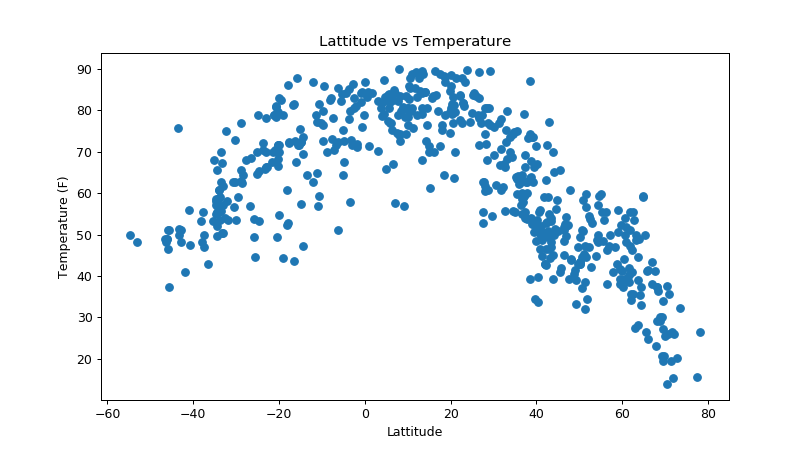

In [6]:
####################################################
#05    ScatterPlot-1 Lat v Temp                    #
#  a- scatterplot lattitude against temperature.   #
#  b- save image to png file.                      #
####################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["temp"])
plt.xlabel("Lattitude")
plt.ylabel("Temperature (F)")
plt.title("Lattitude vs Temperature")
plt.show()

#b
plt.savefig("output_data/lat_vs_temp.png")

The relationship between lattitude and temperature shows an increase in temperature approaching zero degrees lattitude from both the positive and negative sides, as well as higher temperatures away from zero towards the positive.  This is to be expected as the equator (zero degrees lat) receives the most amount of sun.  Also, as it is currently summer in the northern hemisphere (positive lat) we see slighlty higher temperatures to the right of zero as compared to the left (where it is currently winter).

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


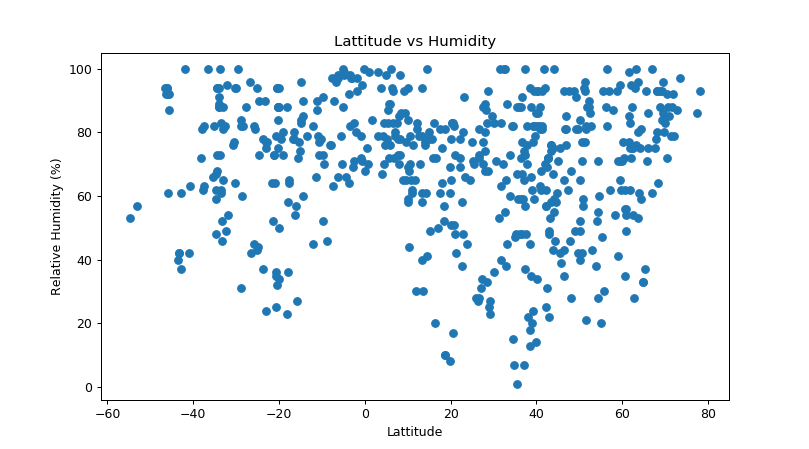

In [7]:
#################################################
#06    ScatterPlot-2 Lat v Humidity             #
#  a- scatterplot lattitude against humidity.   #
#  b- save image to png file.                   #
#################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["humid"])
plt.xlabel("Lattitude")
plt.ylabel("Relative Humidity (%)")
plt.title("Lattitude vs Humidity")
plt.show()

#b
plt.savefig("output_data/lat_vs_humid.png")

Comparing lattitude to relative humidity levels shows no real trend. We do see some empty patches of low humidity levels and minor clustering of higher levels but nothing appears related to lattitude.

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


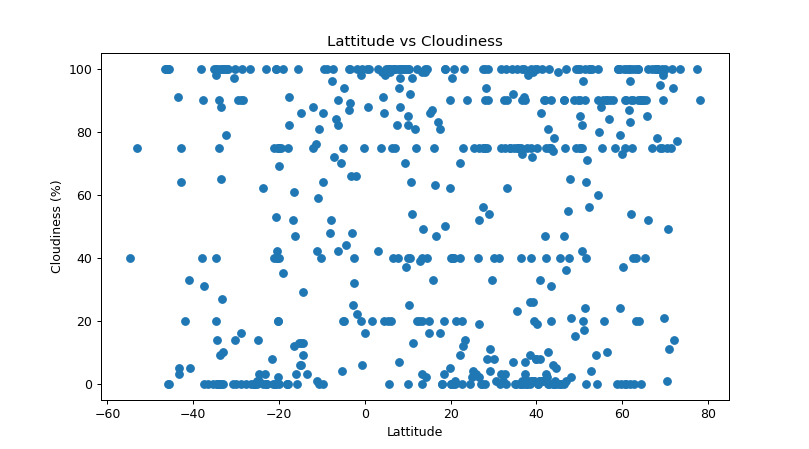

In [8]:
###################################################
#07    ScatterPlot-3 Lat v Cloudiness             #
#  a- scatterplot lattitude against cloudiness.   #
#  b- save image to png file.                     #
###################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["clouds"])
plt.xlabel("Lattitude")
plt.ylabel("Cloudiness (%)")
plt.title("Lattitude vs Cloudiness")
plt.show()

#b
plt.savefig("output_data/lat_vs_clouds.png")

There is no visible relationship between lattitude and cloudiness.  There does appear to be horizontal bands of certain cloud cover percentages, with heavier clustering at the extremes. 

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


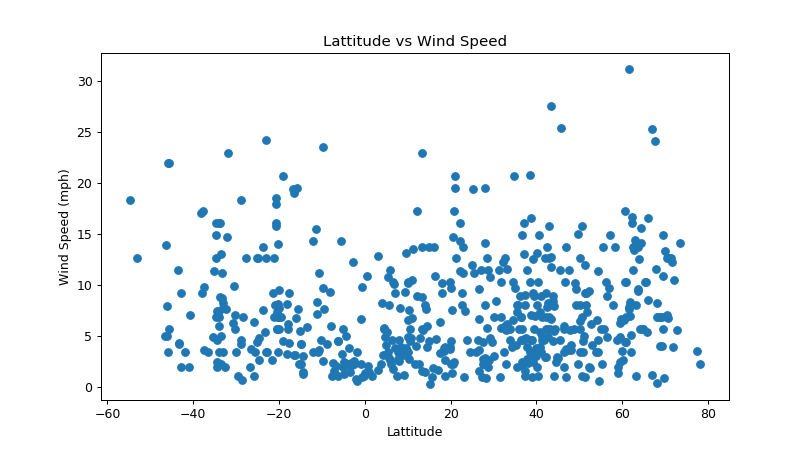

In [9]:
###################################################
#08    ScatterPlot-4 Lat v Wind Speed             #
#  a- scatterplot lattitude against wind speed.   #
#  b- save image to png file.                     #
###################################################

#a
plt.figure(figsize=(9,5))
plt.scatter(clean_city_weather["lat"],clean_city_weather["wind"])
plt.xlabel("Lattitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Lattitude vs Wind Speed")
plt.show()

#b
plt.savefig("output_data/lat_vs_wind.png")

Looking at lattitude vs windspeed shows no relationship.  We do see that at the moment of this extraction global wind speeds are generally low for this sample,

## Linear Regression

In [10]:
##############################################################################################
# 10     LinePlot Function (lineplot)                                                        #
#          > Creates scatterplot, linear regression, or line over scatterplot graph.         #
#   Positional Inputs[Required]: x-axis, y-axis= x and y coordinates for data points.        #
#        xy = tuple with x and y coordinates to annotate slope-intercept formula.            #
#   Keyword Inputs[Optional]: title- title for the graph,  x_label & y_label- axes labels,   #
#        type = "line" - produces linear regression graph only.                              #
#        type = "plot" - produces scatter plot graph only.                                   #
#        type = "both" (or any value not "line" or "plot") - produces line over scatter.     #
#                                                                                            #
#   a- ensure axes are lists for scipy call, set title and labels.                           #
#   b- if not line graph only, produce scatterplot, exit if plot only.                       #
#   c- call scipy linregress() for regression line variables, create regression line.        #
#   d- create linear regression chart.                                                       #
##############################################################################################

def lineplot (xparm,yparm,xy,title="",x_label="",y_label="",type="both"):
#a    
    x_axis = list(xparm) 
    y_axis = list(yparm)
    plt.figure(figsize=(9,5))
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

#b    
    if type != "line":
        plt.scatter(x_axis,y_axis)
        plt.show()
        if type == "plot":
            return
#c        
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis,y_axis)
    regress_line = slope * np.asarray(x_axis) + intercept    # convert sequence to array for floatpoint *
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
#d     
    plt.plot(x_axis, regress_line,"r-")
    plt.annotate(line_eq,xy,fontsize=12,color="r")
    plt.show()

In [11]:
#########################################
#11    Hemisphere df's                  # 
#   a- create northern hemisphere df.   #
#   b- create southern hemisphere df.   #
#########################################

#a
north_city_weather = clean_city_weather[clean_city_weather["lat"] >= 0]
print(f"Number of cities in Northern Hemispher : {len(north_city_weather)}")

#b
south_city_weather = clean_city_weather[clean_city_weather["lat"] < 0]
print(f"Number of cities in Southern Hemispher : {len(south_city_weather)}")

Number of cities in Northern Hemispher : 392
Number of cities in Southern Hemispher : 176


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


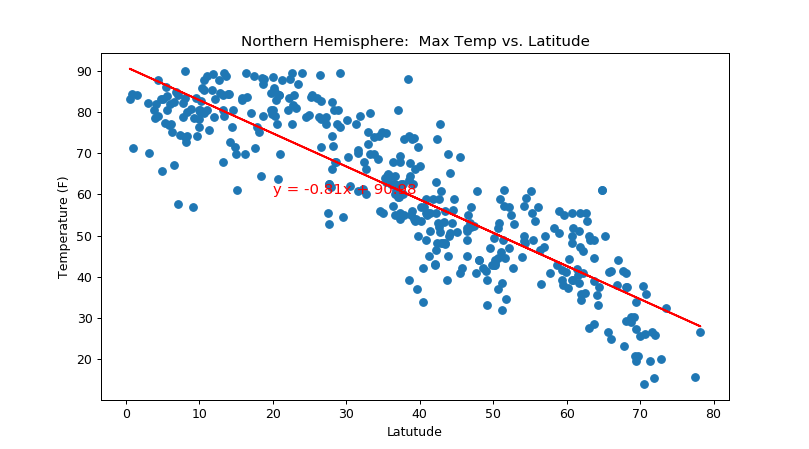

In [12]:
#############################################
#12  Regression1 North lat vs Maxtemp       # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x12 = north_city_weather["lat"]
y12 = north_city_weather["maxtemp"]
title12 = "Northern Hemisphere:  Max Temp vs. Latitude"
xlabel12 = "Latutude"
ylabel12 = "Temperature (F)"
xy12 = (20,60)

#b
lineplot(x12, y12, xy12, title=title12, x_label=xlabel12, y_label=ylabel12, type="both")
plt.savefig("output_data/north_lat_vs_maxtemp.png")

Because lattitudes away from the equator see less sun, it is very evident that the further from the equator, the cooler the temperatures.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


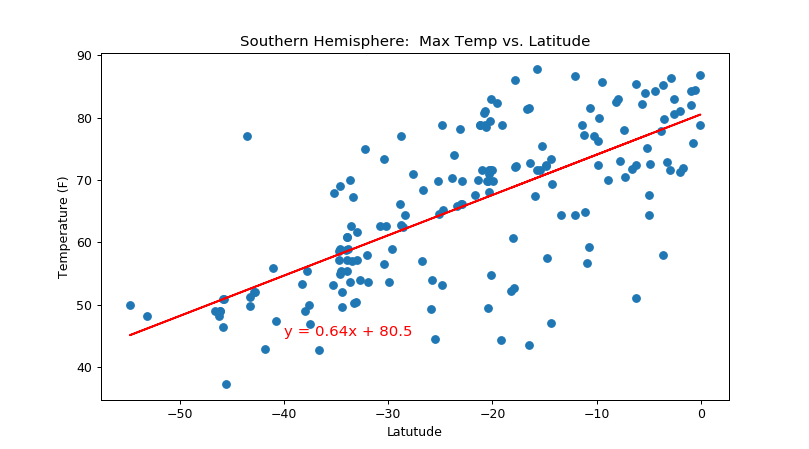

In [13]:
#############################################
#13    Regression2 South lat v Maxtemp      # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x13 = south_city_weather["lat"]
y13 = south_city_weather["maxtemp"]
title13 = "Southern Hemisphere:  Max Temp vs. Latitude"
xlabel13 = "Latutude"
ylabel13 = "Temperature (F)"
xy13 = (-40,45)

#b
lineplot(x13, y13, xy13, title=title13, x_label=xlabel13, y_label=ylabel13, type="both")
plt.savefig("output_data/south_lat_vs_maxtemp.png")

Because lattitudes away from the equator see less sun, it is very evident that the further from the equator, the cooler the temperatures, whether north or south. the southern hemisphere does show a steeper gradient because of their winter creating cooler temperatures than the north.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


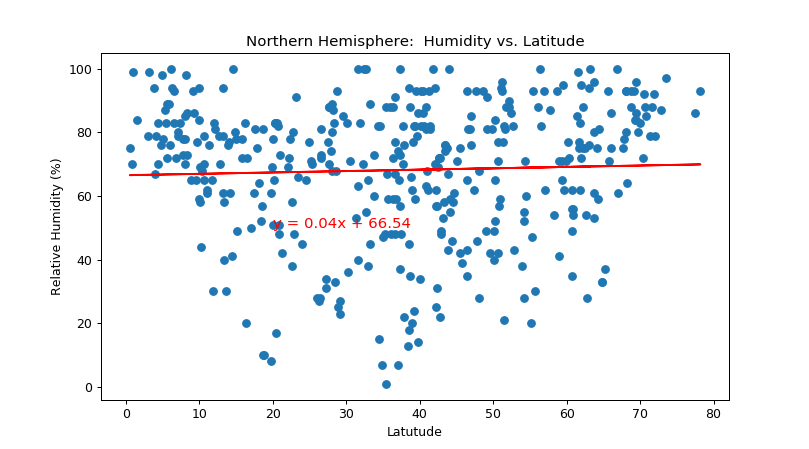

In [14]:
#############################################
#14    Regression3 North lat v Humidity     # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x14 = north_city_weather["lat"]
y14 = north_city_weather["humid"]
title14 = "Northern Hemisphere:  Humidity vs. Latitude"
xlabel14 = "Latutude"
ylabel14 = "Relative Humidity (%)"
xy14 = (20,50)

#b
lineplot(x14, y14, xy14, title=title14, x_label=xlabel14, y_label=ylabel14, type="both")
plt.savefig("output_data/north_lat_vs_humid.png")

the decrease in humidity away from the equator is minor and should not be considered significant, though possibly explained by warm, wet tropical conditions closer to the equator. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


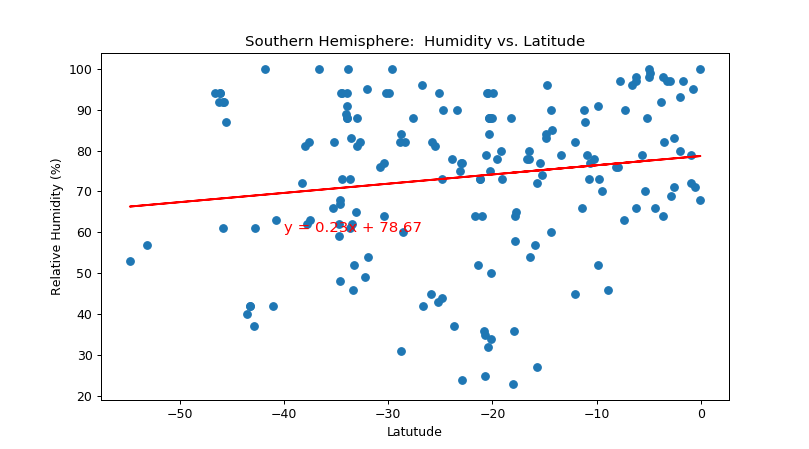

In [15]:
#############################################
#15    Regression4 South lat v Humidity     # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x15 = south_city_weather["lat"]
y15 = south_city_weather["humid"]
title15 = "Southern Hemisphere:  Humidity vs. Latitude"
xlabel15 = "Latutude"
ylabel15 = "Relative Humidity (%)"
xy15 = (-40,60)

#b
lineplot(x15, y15, xy15, title=title15, x_label=xlabel15, y_label=ylabel15, type="both")
plt.savefig("output_data/south_lat_vs_humid.png")

the southern hemisphere shows an even less significant gradient of relationship between humidity and lattitude.  it is showing a very small increase in humidty further from the equator, very similiar slope, in the opposite condition as the northern.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


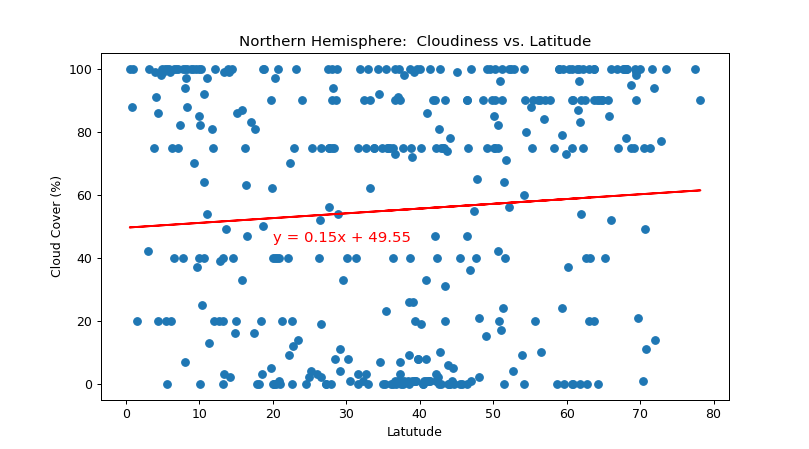

In [16]:
#############################################
#16    Regression5 North lat v Cloudiness   # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x16 = north_city_weather["lat"]
y16 = north_city_weather["clouds"]
title16 = "Northern Hemisphere:  Cloudiness vs. Latitude"
xlabel16 = "Latutude"
ylabel16 = "Cloud Cover (%)"
xy16 = (20,45)

#b
lineplot(x16, y16, xy16, title=title16, x_label=xlabel16, y_label=ylabel16, type="both")
plt.savefig("output_data/north_lat_vs_clouds.png")

linear regression shows no significant coorelation between cloudiness and lattitude in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


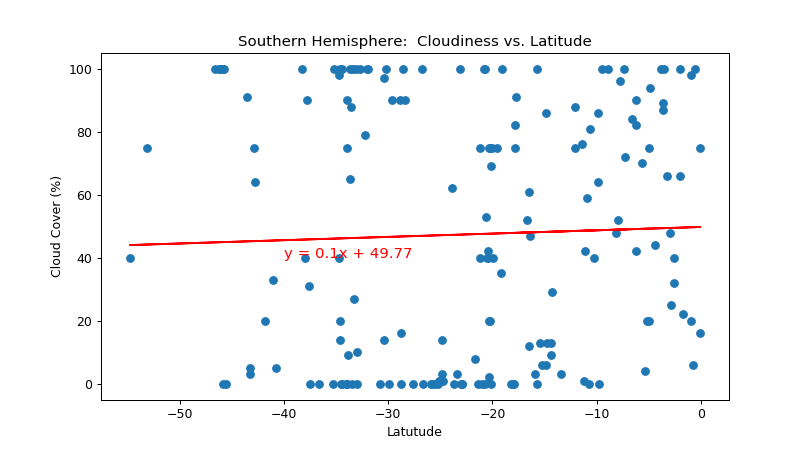

In [17]:
#############################################
#17    Regression6 South lat v Cloudiness   # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x17 = south_city_weather["lat"]
y17 = south_city_weather["clouds"]
title17 = "Southern Hemisphere:  Cloudiness vs. Latitude"
xlabel17 = "Latutude"
ylabel17= "Cloud Cover (%)"
xy17 = (-40,40)

#b
lineplot(x17, y17, xy17, title=title17, x_label=xlabel17, y_label=ylabel17, type="both")
plt.savefig("output_data/south_lat_vs_clouds.png")

although the southern hemisphere shows a regression line 11 times steeper than the northern, with an increase in cloudiness further from the equator, it is unlikely that there is any causation.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


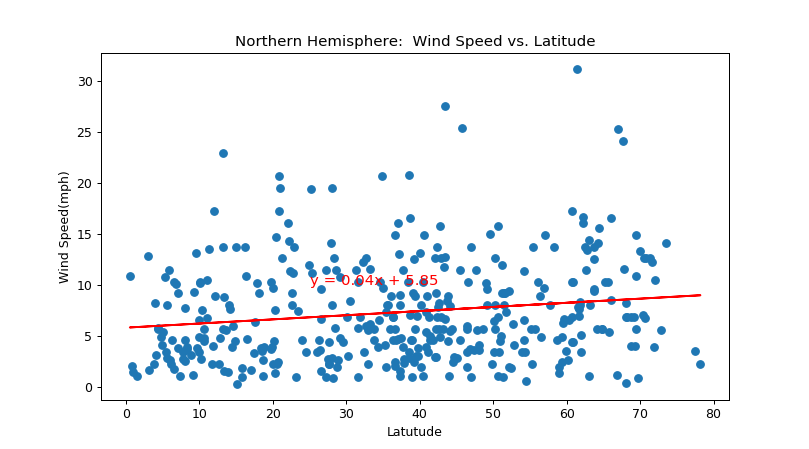

In [18]:
#############################################
#18    Regression7 North lat v WindSpeed    # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x18 = north_city_weather["lat"]
y18 = north_city_weather["wind"]
title18 = "Northern Hemisphere:  Wind Speed vs. Latitude"
xlabel18 = "Latutude"
ylabel18= "Wind Speed(mph)"
xy = (25,10)

#b
lineplot(x18, y18, xy, title=title18, x_label=xlabel18, y_label=ylabel18, type="both")
plt.savefig("output_data/north_lat_vs_wind.png")

linear regression shows no significant coorelation between windspeed and lattitude in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

<IPython.core.display.Javascript object>


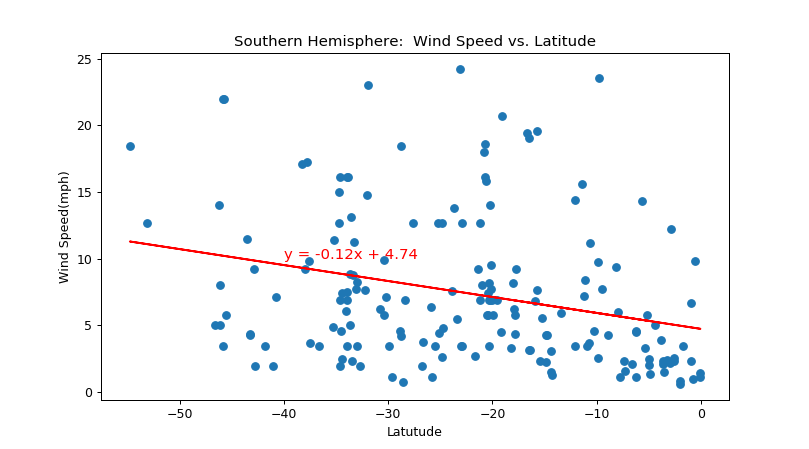

In [19]:
#############################################
#19    Regression8 South lat v Cloudiness   # 
#   a- set datapoints, title, and labels.   #
#   b- call lineplot() to produce graph.    #
#############################################

#a
x19 = south_city_weather["lat"]
y19 = south_city_weather["wind"]
title19 = "Southern Hemisphere:  Wind Speed vs. Latitude"
xlabel19 = "Latutude"
ylabel19= "Wind Speed(mph)"
xy = (-40,10)

#b
lineplot(x19, y19, xy, title=title19, x_label=xlabel19, y_label=ylabel19, type="both")
plt.savefig("output_data/south_lat_vs_wind.png")

though the regression line shows a slight decrease in wind speeds towards the equator from the southern hemisphere, there data does not support a relationship.